<a href="https://colab.research.google.com/github/ElMonteJuan/Programacio-i-robotica-1r-de-batxillerat/blob/main/Analisi_de_dades_de_temperatura_i_humitat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estadísticas de Temperatura:
{'Aula a-23': {'Máximo': 24, 'Mínimo': 23, 'Promedio': 23.78, 'Aumentos': 1, 'Disminuciones': 2}, 'Pati': {'Máximo': 34, 'Mínimo': 28, 'Promedio': 31.23, 'Aumentos': 6, 'Disminuciones': 0}, 'Passadís': {'Máximo': 24, 'Mínimo': 23, 'Promedio': 23.78, 'Aumentos': 1, 'Disminuciones': 2}, 'Aula a-14': {'Máximo': 22, 'Mínimo': 22, 'Promedio': 22.0, 'Aumentos': 0, 'Disminuciones': 0}, 'Laboratori a-12': {'Máximo': 23, 'Mínimo': 22, 'Promedio': 22.12, 'Aumentos': 1, 'Disminuciones': 0}}

Estadísticas de Humedad:
{'Aula a-23': {'Máximo': 39.0, 'Mínimo': 36.0, 'Promedio': 37.37, 'Aumentos': 4, 'Disminuciones': 1}, 'Pati': {'Máximo': 24.0, 'Mínimo': 17.0, 'Promedio': 20.2, 'Aumentos': 0, 'Disminuciones': 7}, 'Passadís': {'Máximo': 34.0, 'Mínimo': 32.0, 'Promedio': 32.48, 'Aumentos': 3, 'Disminuciones': 3}, 'Aula a-14': {'Máximo': 53.0, 'Mínimo': 52.0, 'Promedio': 52.2, 'Aumentos': 1, 'Disminuciones': 0}, 'Laboratori a-12': {'Máximo': 52.0, 'Mínimo': 48.0, 'Promedio':

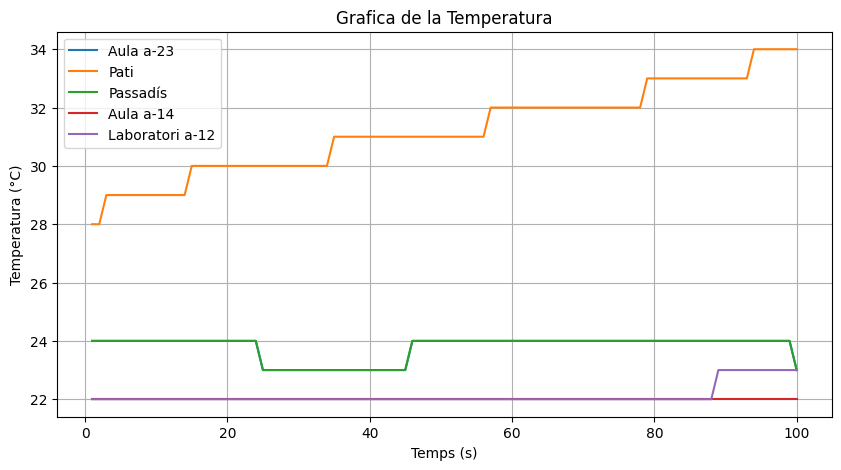

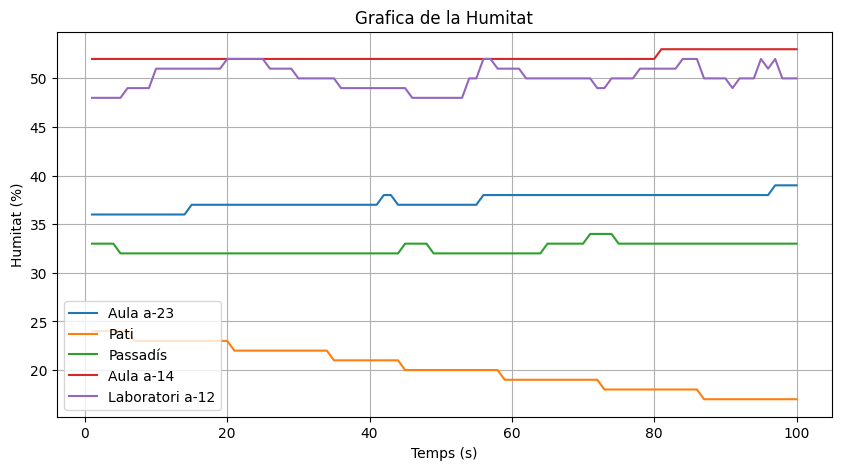

In [ ]:
import pandas as pd  # llibreria per fer tables
import matplotlib.pyplot as plt  # llibreria per fer grafiques

# pujar els csv de la temperatura i la humitat
ruta_temp = "Dades de temperatura - Hoja 1.csv"
ruta_hum = "Dades d'humitat - Hoja 1.csv"

df_temp = pd.read_csv(ruta_temp)  # pujar les dades al dataframe
df_hum = pd.read_csv(ruta_hum)

def calcular_estadisticas(df):
    stats = {}  # guardar els resultats
    for columna in df.columns[1:]:  # omitir la primera columna ja que es de temps
        max_val = df[columna].max()  # trobar el valor maxim
        min_val = df[columna].min()  # trobar el valor minim
        promedio = df[columna].mean()  # trobar el valor promig
        variacion = df[columna].diff().fillna(0)  # diferencia entre valors
        aumento = (variacion > 0).sum()  # quantes vegades ha augmentat el valor
        disminucion = (variacion < 0).sum()  # quantes vegades ha disminuit

        # guardar els resultats al diccionari
        stats[columna] = {
            "Maxim": max_val,
            "Minim": min_val,
            "Promig": promedio,
            "Augments": aumento,
            "Disminucions": disminucion,
        }

    return stats

# calcular les estadsiticas per la temperatura i la humitat
estadisticas_temp = calcular_estadisticas(df_temp)
estadisticas_hum = calcular_estadisticas(df_hum)

print("Estadísticas de Temperatura:")
print(estadisticas_temp)
print("\nEstadísticas de Humedad:")
print(estadisticas_hum)

def graficar_datos(df, titulo, ylabel):
    plt.figure(figsize=(10, 5))  # establir tamany de la grafica
    for columna in df.columns[1:]:  # agafar les dades excepte la del tamps
        plt.plot(df["Temps(s)"], df[columna], label=columna)  # dibuixar la grafica

    plt.xlabel("Temps (s)")  # eix X
    plt.ylabel(ylabel)  # eix Y
    plt.title(titulo)  # nom del grafic
    plt.legend()  # els noms de la llegenda
    plt.grid()  # posar les quadricules
    plt.show()  # mostrar les grafiques

# grafica de temperatura
graficar_datos(df_temp, "Grafica de la Temperatura", "Temperatura (°C)")

# grafica de humitat
graficar_datos(df_hum, "Grafica de la Humitat", "Humitat (%)")
